In [1]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics
from matplotlib_inline.backend_inline import set_matplotlib_formats

# Set graphing format to SVG
set_matplotlib_formats("svg")

In [2]:
oil_prices = pd.read_csv(
    "Weekly_U.S._All_Grades_All_Formulations_Retail_Gasoline_Prices.csv",
    #"Europe_Brent_Spot_Price_FOB.csv",
    header=1, parse_dates=[0], names=["Date", "Price"], index_col=0
)
covid_data = pd.read_csv("WHO-COVID-19-global-data.csv", parse_dates=[0], index_col=0)

# Filter US COVID data
covid_data = covid_data.loc[covid_data["Country_code"] == "US"]

# Sort by date
oil_prices.sort_values(by="Date", ascending=True, inplace=True)
covid_data.sort_values(by="Date_reported", ascending=True, inplace=True)

# Linearly fill the oil prices to daily
new_idx = pd.date_range(min(oil_prices.index), max(oil_prices.index))
oil_prices = oil_prices.reindex(new_idx).interpolate()

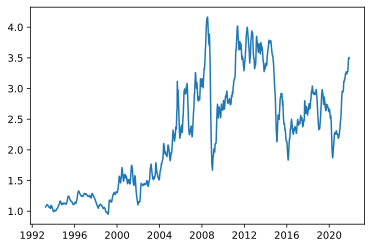

In [3]:
plt.plot(oil_prices)

In [4]:
# Merge datasets
merged_data = pd.merge(oil_prices, covid_data, how="inner", left_index=True, right_index=True)

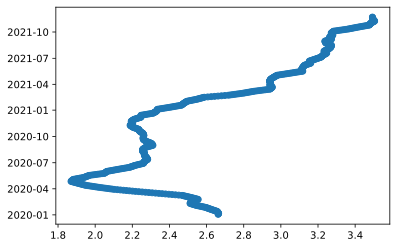

In [5]:
x = merged_data.index
y = merged_data["Price"]

plt.scatter(y, x)

In [ ]:
def outlier_iqr(data):

    for i in range(len(data.columns)):

        col = data.iloc[:,i]

        q1 = col.describe()['25%']
        q3 = col.describe()['75%']
        iqr = q3 - q1 

        outlier_min = q1 - (iqr) * 1.5
        outlier_max = q3 + (iqr) * 1.5

        col[col < outlier_min] = None
        col[col > outlier_max] = None

    return data
outlier_iqr(merged_data)
print(outlier_iqr)